***
# Machine learning Classification model
***
***

### importing the library

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

import warnings

warnings.filterwarnings("ignore")

### First Read the data
***

In [2]:
da=pd.read_csv('BRCA.csv')
da

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,TCGA-D8-A1XD,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,15-Jan-17,19-Jun-17,Alive
1,TCGA-EW-A1OX,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy,26-Apr-17,09-Nov-18,Dead
2,TCGA-A8-A079,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,08-Sep-17,09-Jun-18,Alive
3,TCGA-D8-A1XR,56.0,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,25-Jan-17,12-Jul-17,Alive
4,TCGA-BH-A0BF,56.0,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,06-May-17,27-Jun-19,Dead
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
337,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
339,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


* ### Check the null Values
***

In [3]:
da.isna().sum()

Patient_ID             7
Age                    7
Gender                 7
Protein1               7
Protein2               7
Protein3               7
Protein4               7
Tumour_Stage           7
Histology              7
ER status              7
PR status              7
HER2 status            7
Surgery_type           7
Date_of_Surgery        7
Date_of_Last_Visit    24
Patient_Status        20
dtype: int64

* ### Covrting the unreadable data to numirc values
***

In [4]:
da['Tumour_Stage'].value_counts()

II     189
III     81
I       64
Name: Tumour_Stage, dtype: int64

In [5]:
da['Tumour_Stage'].replace('I',1,inplace=True)
da['Tumour_Stage'].replace('II',2,inplace=True)
da['Tumour_Stage'].replace('III',3,inplace=True)

* ### Check the duplicated and delete it
***

In [6]:
da.duplicated().sum()

6

In [7]:
da.drop([334,334,336,335,337,338,339,340],inplace=True)
da.drop(['Patient_ID'],axis=1,inplace=True)

In [8]:
da

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,3.0,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,15-Jan-17,19-Jun-17,Alive
1,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,2.0,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy,26-Apr-17,09-Nov-18,Dead
2,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,3.0,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,08-Sep-17,09-Jun-18,Alive
3,56.0,FEMALE,0.345090,-0.21147,-0.19304,0.124270,2.0,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,25-Jan-17,12-Jul-17,Alive
4,56.0,FEMALE,0.221550,1.90680,0.52045,-0.311990,2.0,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,06-May-17,27-Jun-19,Dead
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,36.0,FEMALE,0.231800,0.61804,-0.55779,-0.517350,3.0,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Simple Mastectomy,11-Nov-19,09-Feb-20,Dead
330,44.0,MALE,0.732720,1.11170,-0.26952,-0.354920,2.0,Infiltrating Lobular Carcinoma,Positive,Positive,Negative,Other,01-Nov-19,04-Mar-20,Dead
331,61.0,FEMALE,-0.719470,2.54850,-0.15024,0.339680,2.0,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Lumpectomy,11-Nov-19,18-Jan-21,Dead
332,79.0,FEMALE,0.479400,2.05590,-0.53136,-0.188480,1.0,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Lumpectomy,21-Nov-19,19-Feb-21,Dead


In [9]:
da.isna().sum()

Age                    0
Gender                 0
Protein1               0
Protein2               0
Protein3               0
Protein4               0
Tumour_Stage           0
Histology              0
ER status              0
PR status              0
HER2 status            0
Surgery_type           0
Date_of_Surgery        0
Date_of_Last_Visit    17
Patient_Status        13
dtype: int64

* ### there is a date value we will split it's values and store it in 'new' for 'Date_of_Surgery' and 'new2' for 'Date_of_Last_Visit' then append it in our dataset
***

In [10]:
new=da['Date_of_Surgery'].str.split('-',expand=True)
new
new1=da['Date_of_Last_Visit'].str.split('-',expand=True)
new1
#=======================================================================
da["day_Sur"]= pd.to_numeric(new[0])
da["month_Sur"]= new[1]
da["year_Sur"]=pd.to_numeric(new[2])
da["day_LV"]=pd.to_numeric( new1[0])
da["month_LV"]= new1[1]
da["year_LV"]=pd.to_numeric(new1[2])
print(da)

      Age  Gender  Protein1  Protein2  Protein3  Protein4  Tumour_Stage  \
0    36.0  FEMALE  0.080353   0.42638   0.54715  0.273680           3.0   
1    43.0  FEMALE -0.420320   0.57807   0.61447 -0.031505           2.0   
2    69.0  FEMALE  0.213980   1.31140  -0.32747 -0.234260           3.0   
3    56.0  FEMALE  0.345090  -0.21147  -0.19304  0.124270           2.0   
4    56.0  FEMALE  0.221550   1.90680   0.52045 -0.311990           2.0   
..    ...     ...       ...       ...       ...       ...           ...   
329  36.0  FEMALE  0.231800   0.61804  -0.55779 -0.517350           3.0   
330  44.0    MALE  0.732720   1.11170  -0.26952 -0.354920           2.0   
331  61.0  FEMALE -0.719470   2.54850  -0.15024  0.339680           2.0   
332  79.0  FEMALE  0.479400   2.05590  -0.53136 -0.188480           1.0   
333  76.0  FEMALE -0.244270   0.92556  -0.41823 -0.067848           1.0   

                          Histology ER status PR status  ...  \
0     Infiltrating Ductal Carcinoma

In [11]:
# droping the date columns
da.drop(['Date_of_Surgery'],axis=1,inplace=True)
da.drop(['Date_of_Last_Visit'],axis=1,inplace=True)

In [12]:
da

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Patient_Status,day_Sur,month_Sur,year_Sur,day_LV,month_LV,year_LV
0,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,3.0,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,Alive,15,Jan,17,19.0,Jun,17.0
1,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,2.0,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy,Dead,26,Apr,17,9.0,Nov,18.0
2,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,3.0,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,Alive,8,Sep,17,9.0,Jun,18.0
3,56.0,FEMALE,0.345090,-0.21147,-0.19304,0.124270,2.0,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,Alive,25,Jan,17,12.0,Jul,17.0
4,56.0,FEMALE,0.221550,1.90680,0.52045,-0.311990,2.0,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,Dead,6,May,17,27.0,Jun,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,36.0,FEMALE,0.231800,0.61804,-0.55779,-0.517350,3.0,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Simple Mastectomy,Dead,11,Nov,19,9.0,Feb,20.0
330,44.0,MALE,0.732720,1.11170,-0.26952,-0.354920,2.0,Infiltrating Lobular Carcinoma,Positive,Positive,Negative,Other,Dead,1,Nov,19,4.0,Mar,20.0
331,61.0,FEMALE,-0.719470,2.54850,-0.15024,0.339680,2.0,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Lumpectomy,Dead,11,Nov,19,18.0,Jan,21.0
332,79.0,FEMALE,0.479400,2.05590,-0.53136,-0.188480,1.0,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Lumpectomy,Dead,21,Nov,19,19.0,Feb,21.0


### We converting the month data to numbers 
***

In [13]:
sp=da['month_Sur'].value_counts()
sp=pd.DataFrame(sp)
sp.T

,Nov,May,Jun,Oct,Mar,Apr,Sep,Jul,Dec,Jan,Aug,Feb
month_Sur,34,32,32,30,29,28,27,26,25,24,24,23


In [14]:
da['month_Sur'].replace('Jan',1,inplace=True)
da['month_Sur'].replace('Feb',2,inplace=True)
da['month_Sur'].replace('Mar',3,inplace=True)
da['month_Sur'].replace('Apr',4,inplace=True)
da['month_Sur'].replace('May',5,inplace=True)
da['month_Sur'].replace('Jun',6,inplace=True)
da['month_Sur'].replace('Jul',7,inplace=True)
da['month_Sur'].replace('Aug',8,inplace=True)
da['month_Sur'].replace('Sep',9,inplace=True)
da['month_Sur'].replace('Oct',10,inplace=True)
da['month_Sur'].replace('Nov',11,inplace=True)
da['month_Sur'].replace('Dec',12,inplace=True)

In [15]:
da['month_LV'].replace('Jan',1,inplace=True)
da['month_LV'].replace('Feb',2,inplace=True)
da['month_LV'].replace('Mar',3,inplace=True)
da['month_LV'].replace('Apr',4,inplace=True)
da['month_LV'].replace('May',5,inplace=True)
da['month_LV'].replace('Jun',6,inplace=True)
da['month_LV'].replace('Jul',7,inplace=True)
da['month_LV'].replace('Aug',8,inplace=True)
da['month_LV'].replace('Sep',9,inplace=True)
da['month_LV'].replace('Oct',10,inplace=True)
da['month_LV'].replace('Nov',11,inplace=True)
da['month_LV'].replace('Dec',12,inplace=True)

In [16]:
print(da.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 334 entries, 0 to 333
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             334 non-null    float64
 1   Gender          334 non-null    object 
 2   Protein1        334 non-null    float64
 3   Protein2        334 non-null    float64
 4   Protein3        334 non-null    float64
 5   Protein4        334 non-null    float64
 6   Tumour_Stage    334 non-null    float64
 7   Histology       334 non-null    object 
 8   ER status       334 non-null    object 
 9   PR status       334 non-null    object 
 10  HER2 status     334 non-null    object 
 11  Surgery_type    334 non-null    object 
 12  Patient_Status  321 non-null    object 
 13  day_Sur         334 non-null    int64  
 14  month_Sur       334 non-null    int64  
 15  year_Sur        334 non-null    int64  
 16  day_LV          317 non-null    float64
 17  month_LV        317 non-null    flo

In [17]:
print(da.isna().sum())

Age                0
Gender             0
Protein1           0
Protein2           0
Protein3           0
Protein4           0
Tumour_Stage       0
Histology          0
ER status          0
PR status          0
HER2 status        0
Surgery_type       0
Patient_Status    13
day_Sur            0
month_Sur          0
year_Sur           0
day_LV            17
month_LV          17
year_LV           17
dtype: int64


* ### Mack a lableEncoder to round all object data to numirc
***

In [18]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

for col in da.columns:
    if da[col].dtype=='object':
        da[col]=le.fit_transform(da[col])
          

In [19]:
da

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Patient_Status,day_Sur,month_Sur,year_Sur,day_LV,month_LV,year_LV
0,36.0,0,0.080353,0.42638,0.54715,0.273680,3.0,0,0,0,0,1,0,15,1,17,19.0,6.0,17.0
1,43.0,0,-0.420320,0.57807,0.61447,-0.031505,2.0,2,0,0,0,0,1,26,4,17,9.0,11.0,18.0
2,69.0,0,0.213980,1.31140,-0.32747,-0.234260,3.0,0,0,0,0,2,0,8,9,17,9.0,6.0,18.0
3,56.0,0,0.345090,-0.21147,-0.19304,0.124270,2.0,0,0,0,0,1,0,25,1,17,12.0,7.0,17.0
4,56.0,0,0.221550,1.90680,0.52045,-0.311990,2.0,0,0,0,0,2,1,6,5,17,27.0,6.0,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,36.0,0,0.231800,0.61804,-0.55779,-0.517350,3.0,0,0,0,1,3,1,11,11,19,9.0,2.0,20.0
330,44.0,1,0.732720,1.11170,-0.26952,-0.354920,2.0,1,0,0,0,2,1,1,11,19,4.0,3.0,20.0
331,61.0,0,-0.719470,2.54850,-0.15024,0.339680,2.0,0,0,0,0,0,1,11,11,19,18.0,1.0,21.0
332,79.0,0,0.479400,2.05590,-0.53136,-0.188480,1.0,0,0,0,1,0,1,21,11,19,19.0,2.0,21.0


* ### Replace the null valeue with the mode 
***

In [20]:
da['Patient_Status'].value_counts()

0    255
1     66
2     13
Name: Patient_Status, dtype: int64

In [21]:
da['Patient_Status'].replace(2,0,inplace=True)

In [22]:
da['Patient_Status'].value_counts()

0    268
1     66
Name: Patient_Status, dtype: int64

In [23]:
# drop the null value in the date
da.dropna(inplace=True)

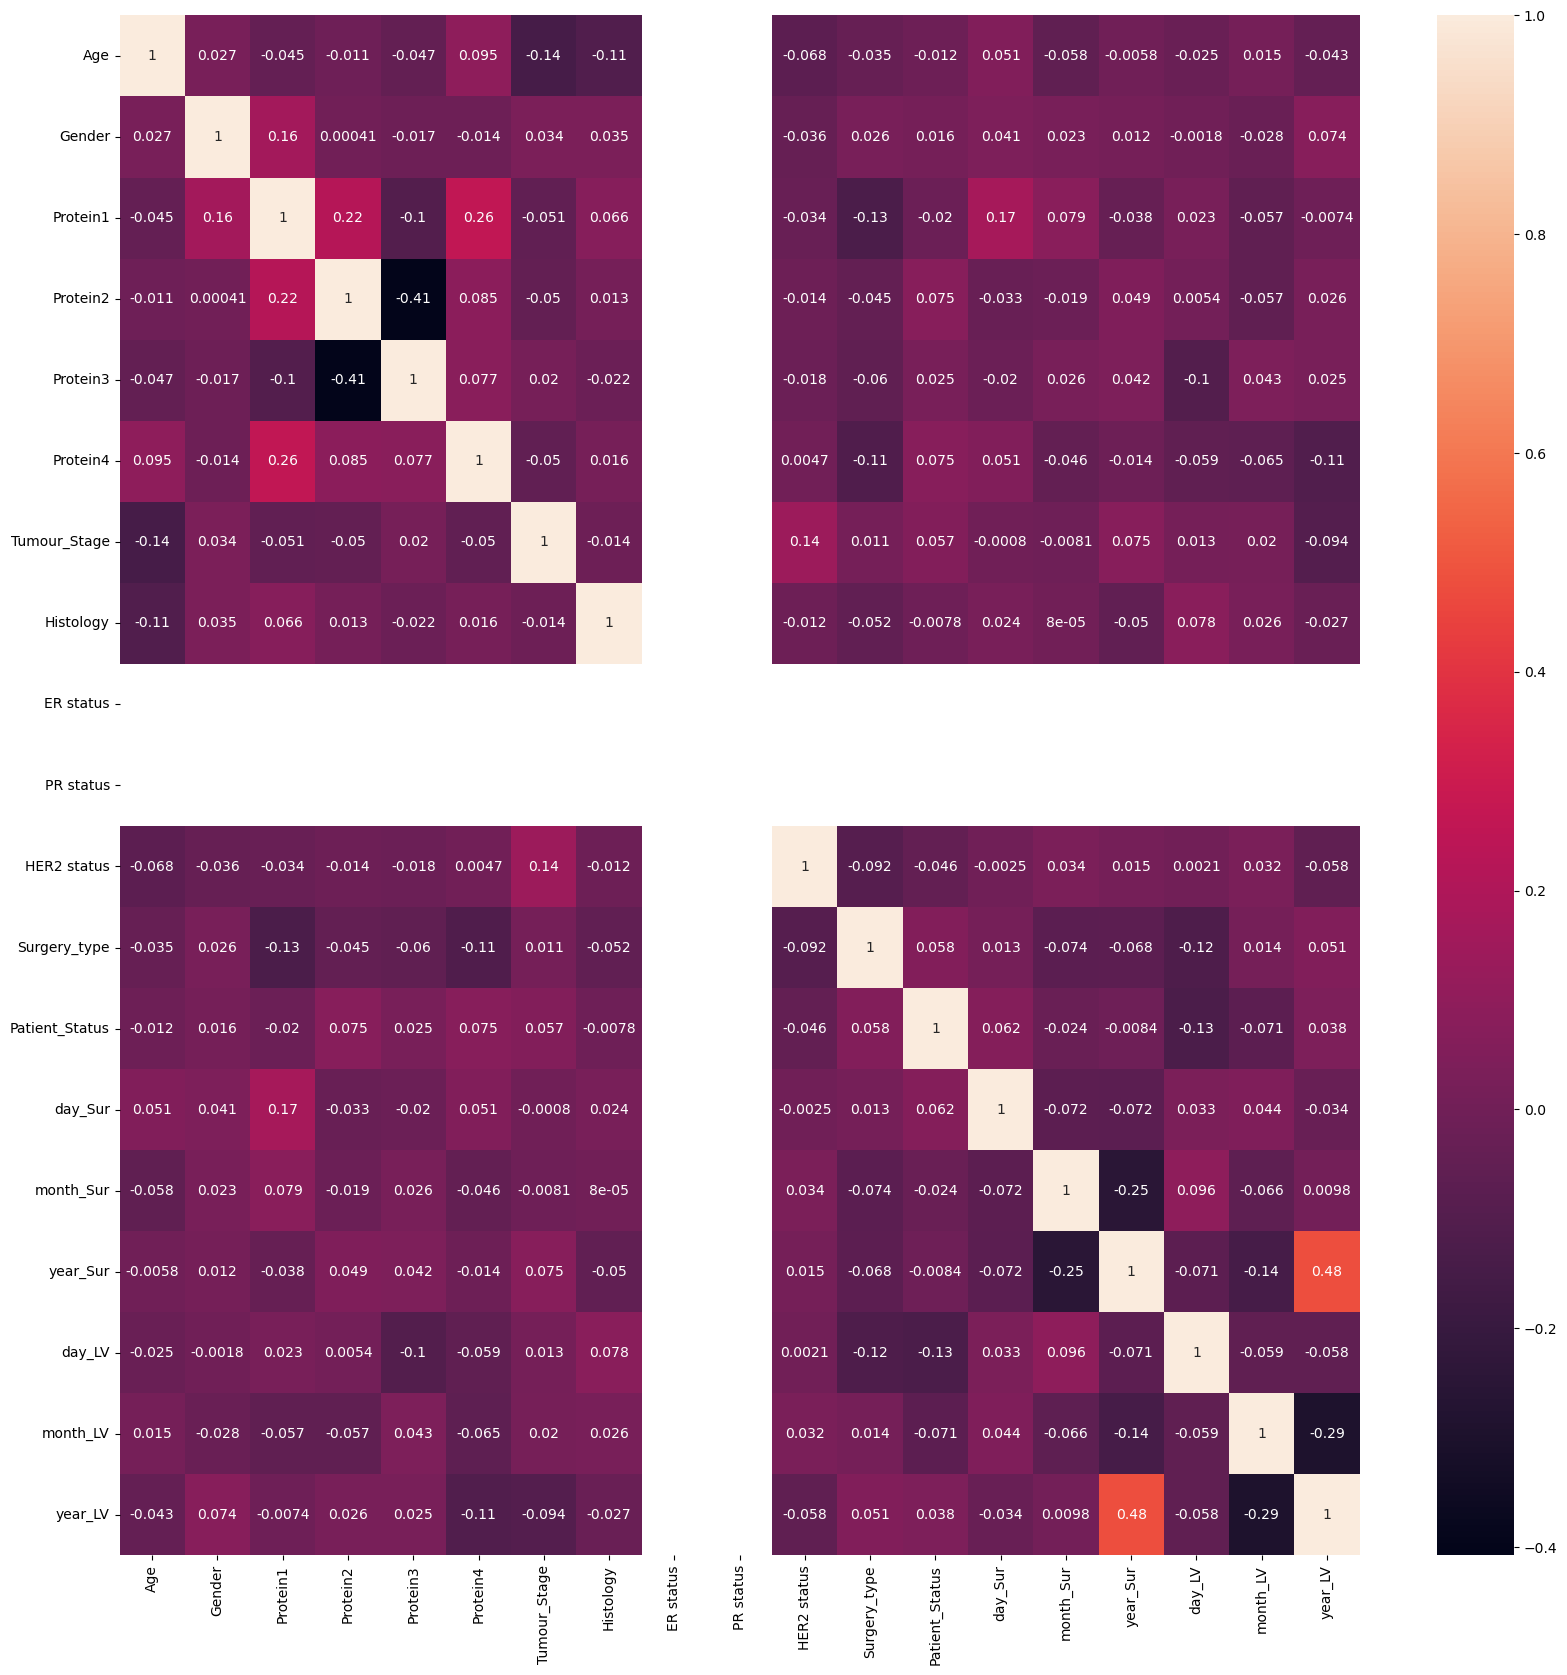

In [24]:
plt.figure(figsize=(20,20))
sb.heatmap(da.corr(),annot=True)
plt.show()

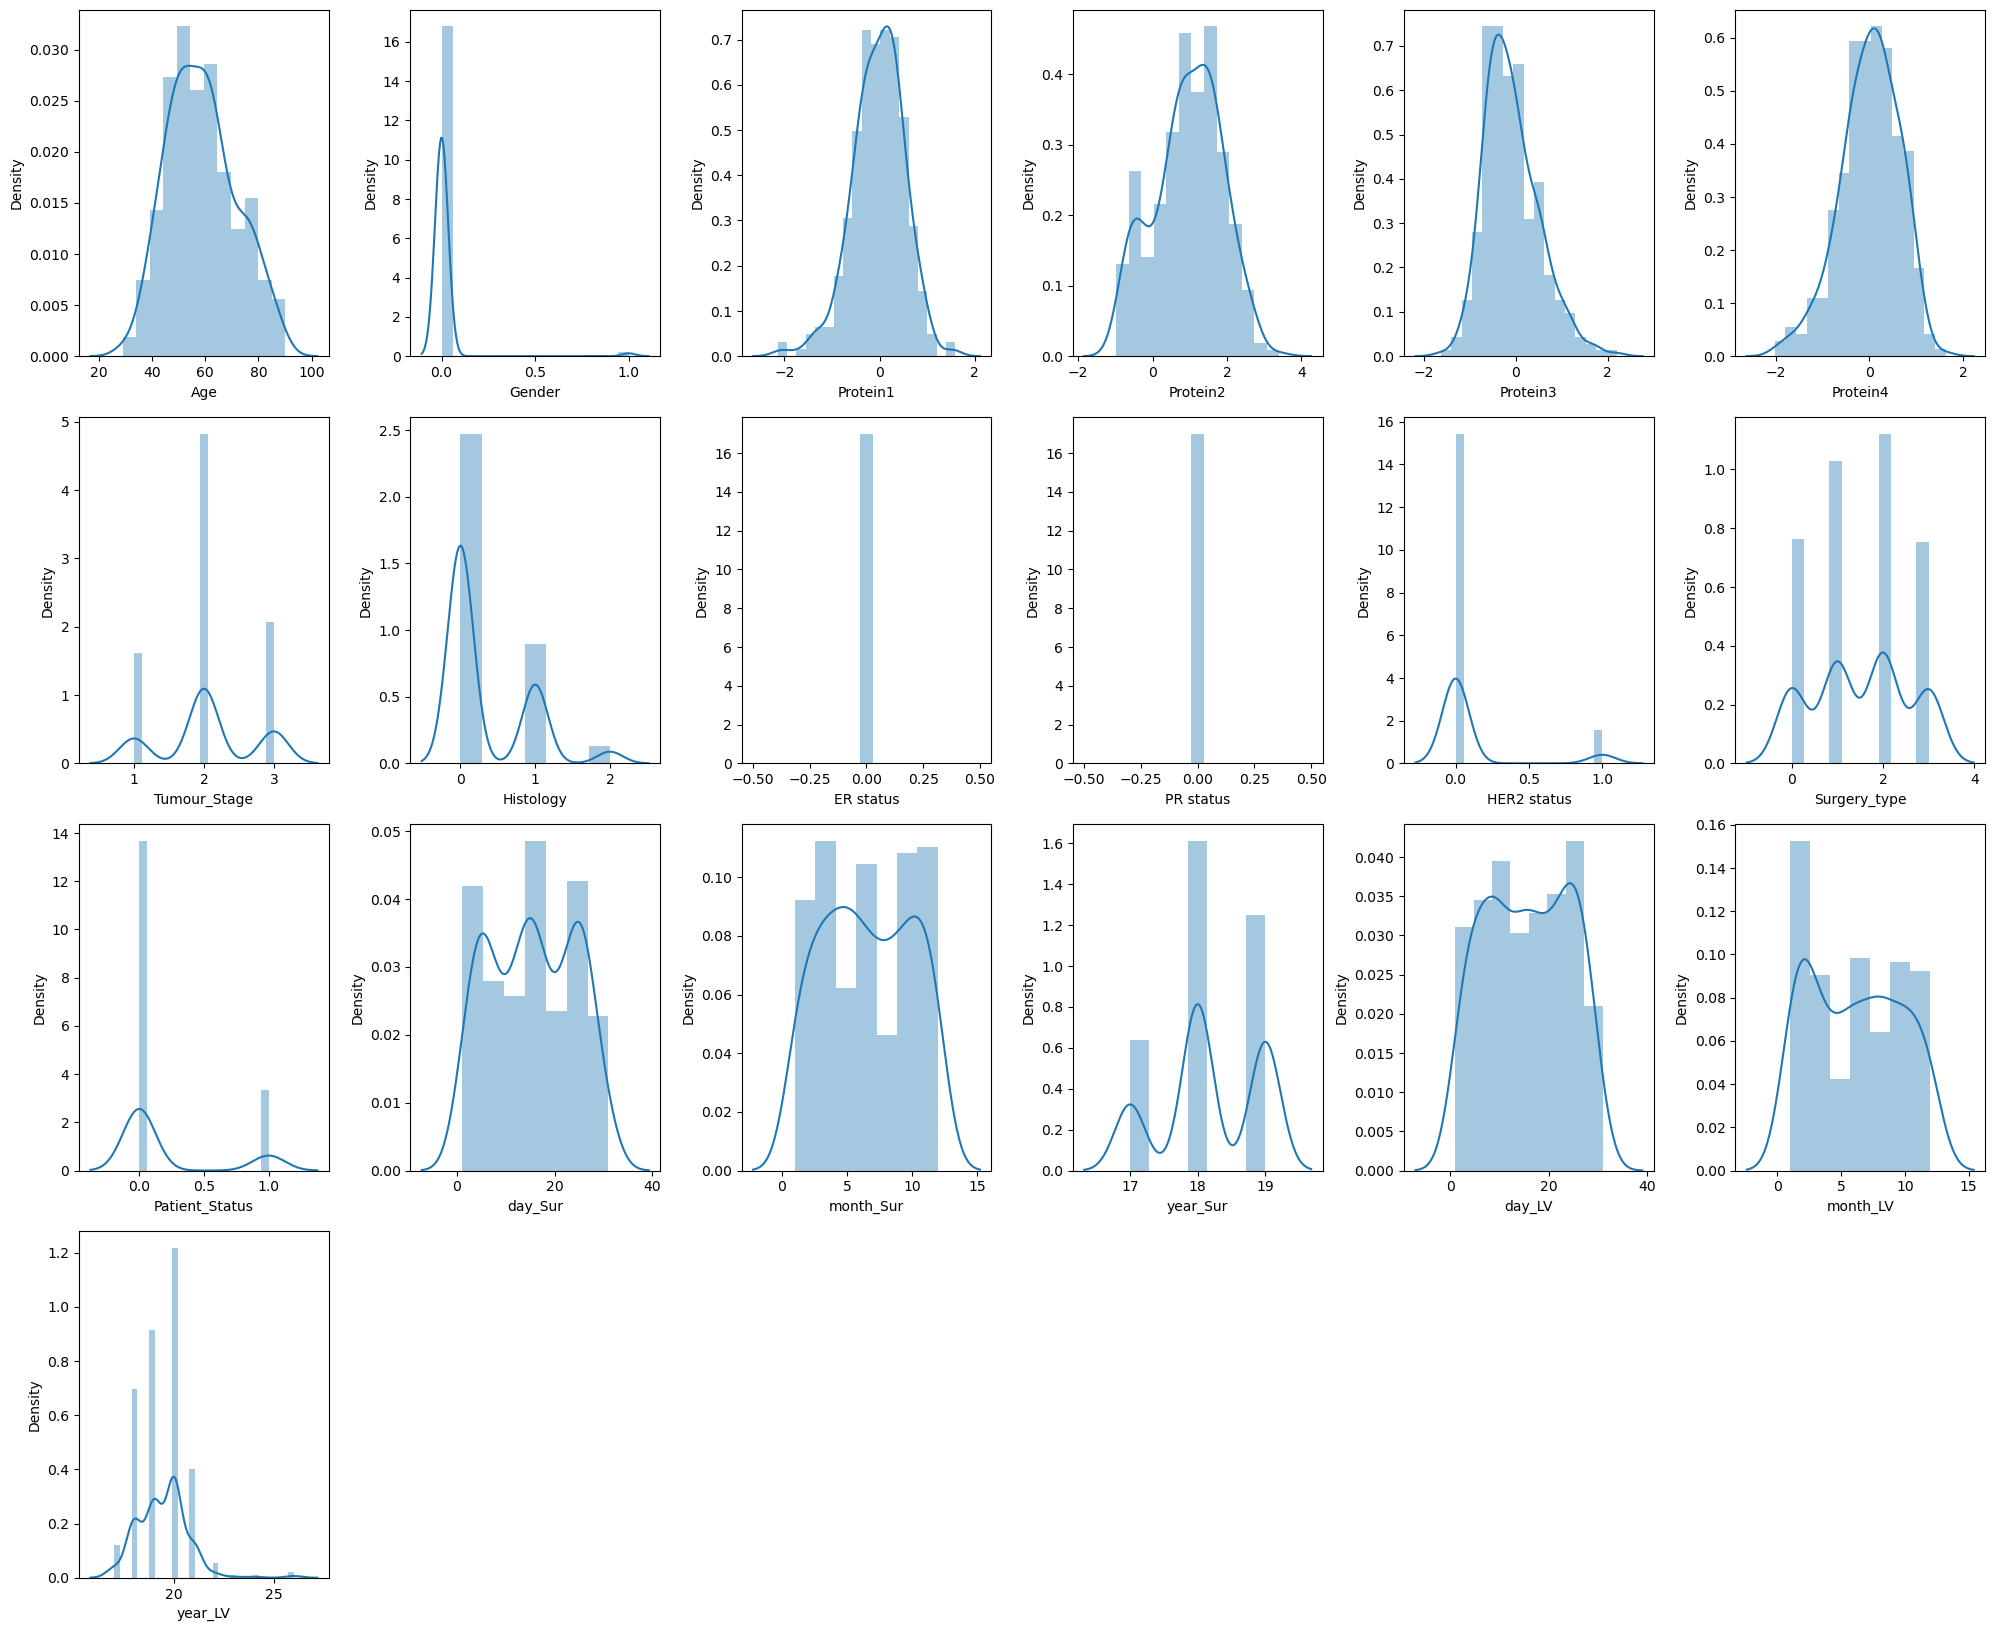

In [25]:
plt.figure(figsize=(20,20))
i=1
for col in da.columns:
    plt.subplot(5,6,i)
    sb.distplot(da[col])
    i+=1
plt.tight_layout(pad=0.9)
plt.show()

* ### there is a fixed value in feture ER Status PR Status Then drop them
***

In [26]:
da.drop(['ER status','PR status'],axis=1,inplace=True)

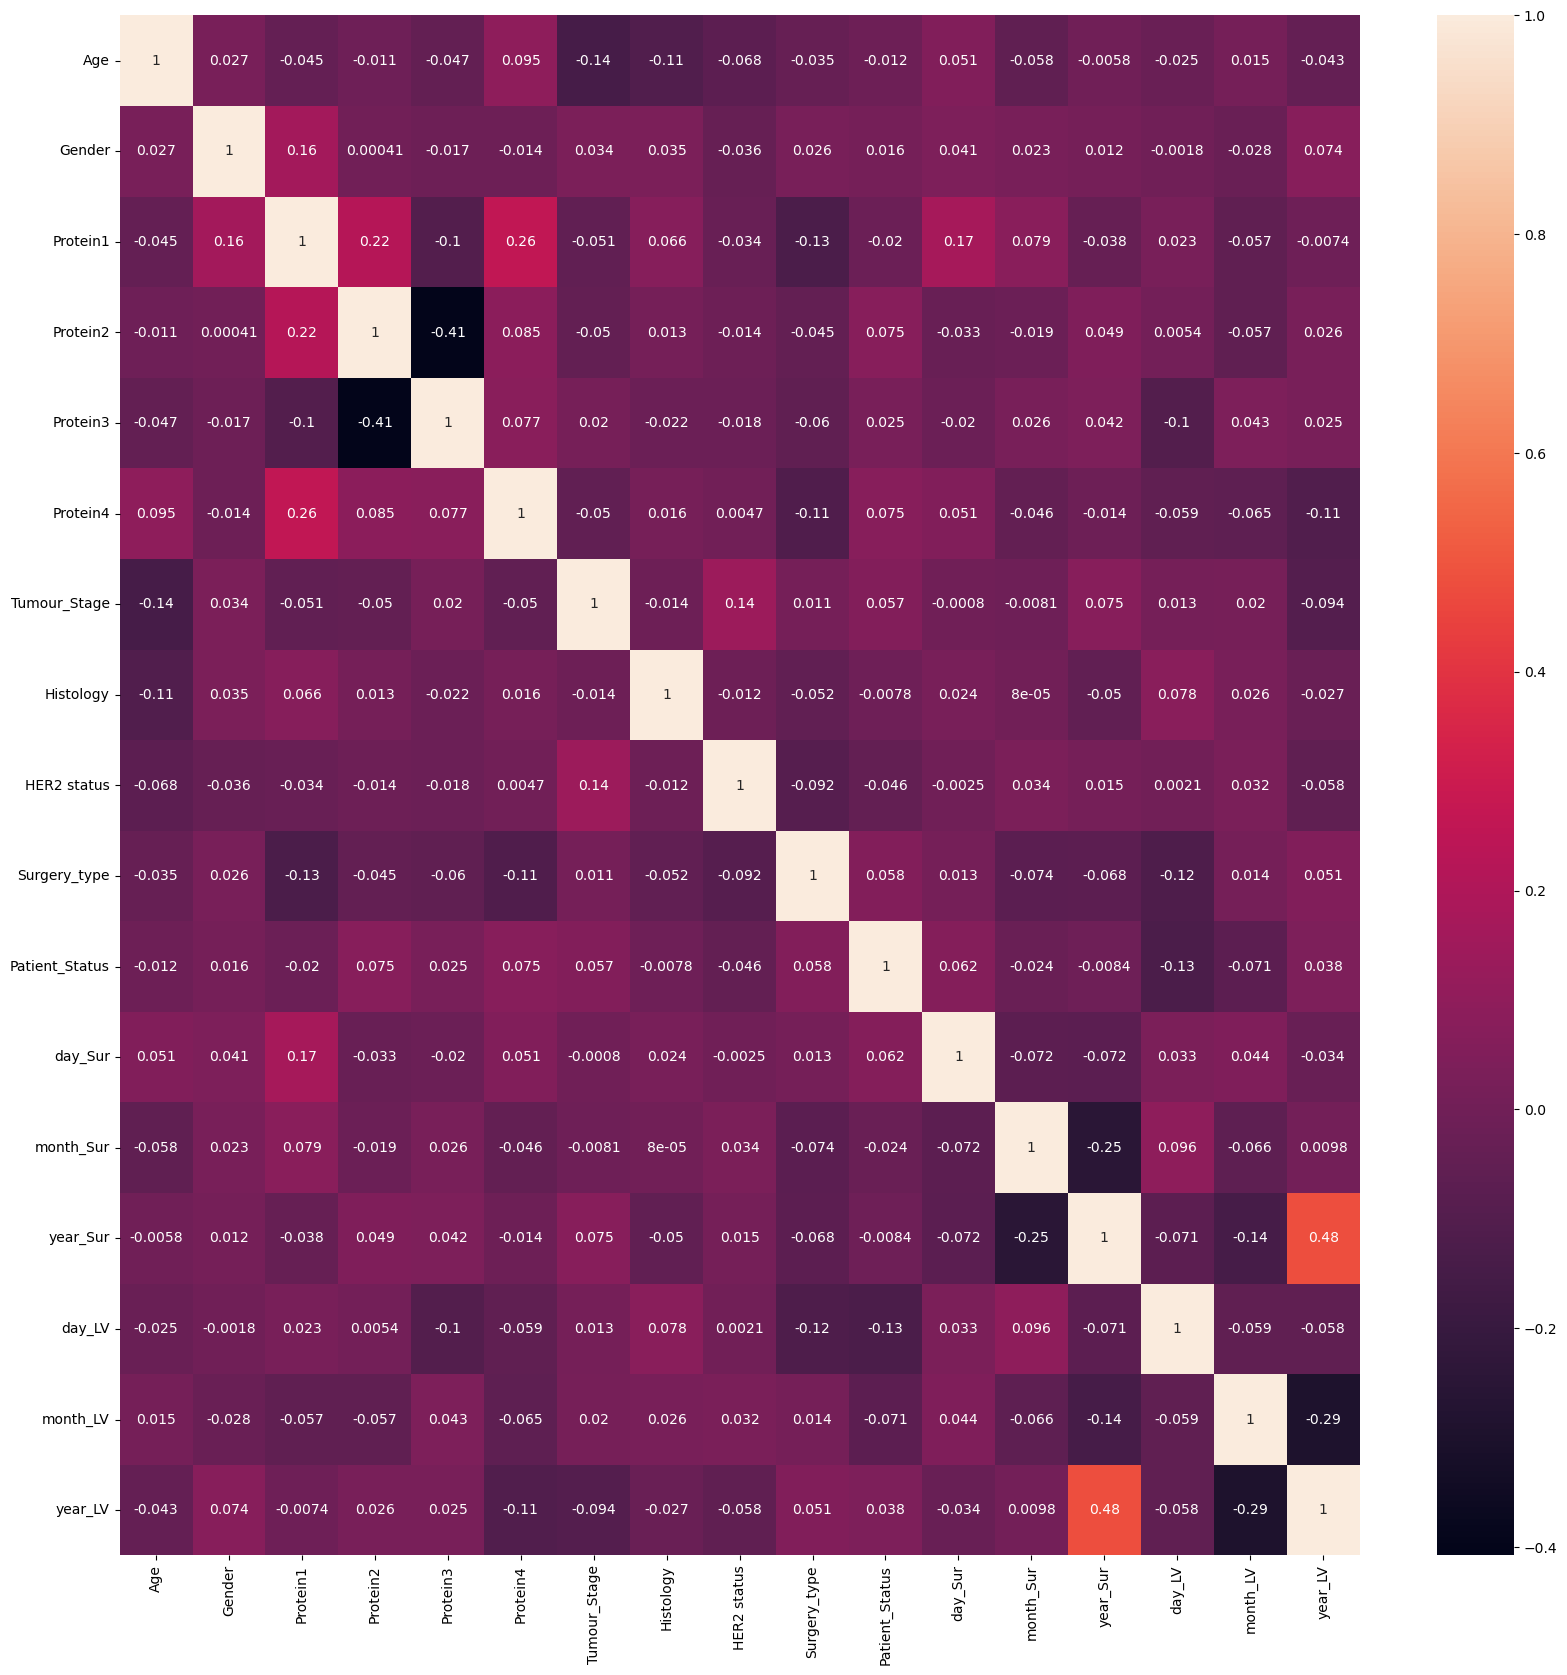

In [27]:
plt.figure(figsize=(20,20))
sb.heatmap(da.corr(),annot=True)
plt.show()

* ### split the data into train and test 
***

In [28]:
x=da.drop(['Patient_Status'],axis=1).values
y=da.loc[:,'Patient_Status'].values

In [29]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3)

* ### applaing the machine learning model Classification 
***

In [30]:
from sklearn.preprocessing import StandardScaler

sd= StandardScaler()
train_x=sd.fit_transform(train_x)
test_x=sd.transform(test_x)

In [31]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(train_x,train_y)

LogisticRegression()

In [32]:
y_pred=model.predict(test_x)
from sklearn.metrics import confusion_matrix
print (confusion_matrix(y_pred,test_y))

[[74 19]
 [ 3  0]]


In [33]:
from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score
print ('Accuracy : ', accuracy_score(test_y,y_pred))
print ('Recall : ',recall_score(test_y,y_pred))
print ('precision : ',precision_score(test_y,y_pred))
print ('F1Score : ',f1_score(test_y,y_pred))

Accuracy :  0.7708333333333334
Recall :  0.0
precision :  0.0
F1Score :  0.0


# name : Omar Khalid Mahmoud
# Grope :AI 30